In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
#getting the precise number of rows and columns
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df = df.drop(['menu_item'], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.drop_duplicates(inplace = True)
df.shape

(51717, 16)

By looking at rate values we see that the rating is given as "x/5". We dont want the "/5 as rate can be an important part of analysis"

In [9]:
df['rate'].unique()
#We can see there are 2 string values "NEW" and "-". 

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
def rate_modifier(value):
    if(value == 'NEW' or value == '-'):
        return np.nan
    
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

In [11]:
df['rate'] = df['rate'].apply(rate_modifier)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
df.rename(columns={'rate': 'rate (/5)'}, inplace  =True)

df.head()

,url,address,name,online_order,book_table,rate (/5),votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [13]:
df = df.drop(['url','address','phone','reviews_list','listed_in(city)'], axis = 1)

In [14]:
df.head()

,name,online_order,book_table,rate (/5),votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [15]:
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(51717, 11)
(32051, 11)


In [16]:
df.rename(columns={'rate (/5)': 'rate'}, inplace  =True)
df['rate'].isnull().sum()

4910

In [17]:
import scipy
from scipy.stats import shapiro

In [18]:
temp_data = df['rate'].dropna()

#doing shapiro-wilk test to check the distribution of the data using p_value

stat, p_value = shapiro(temp_data)
print(p_value)


0.0


C:\Users\gohil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [19]:
if p_value > 0.05:
    print(f"The data appears to be normally distrbuted (p_value = {p_value})")
else:
    print(f"The data appears to be normally distrbuted (p_value = {p_value})")

The data appears to be normally distrbuted (p_value = 0.0)


p_value is appearing to be 0, which means the data is not normally distributed. 
for replacement of null values we need to verify once more for what to replace null values with mean or median. Indication from shapiro that p_value is 0 i.e not normally distributed, it makes more sense to replace the null values with median, as it can be more appropriate measure of central tendency than the mean.

we will cross verify the normality once more for the final decision.

In [20]:
from scipy import stats

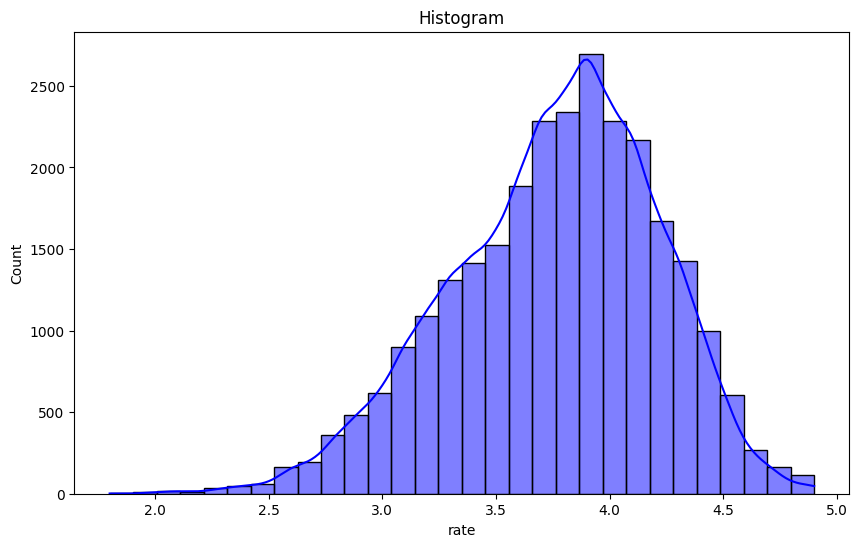

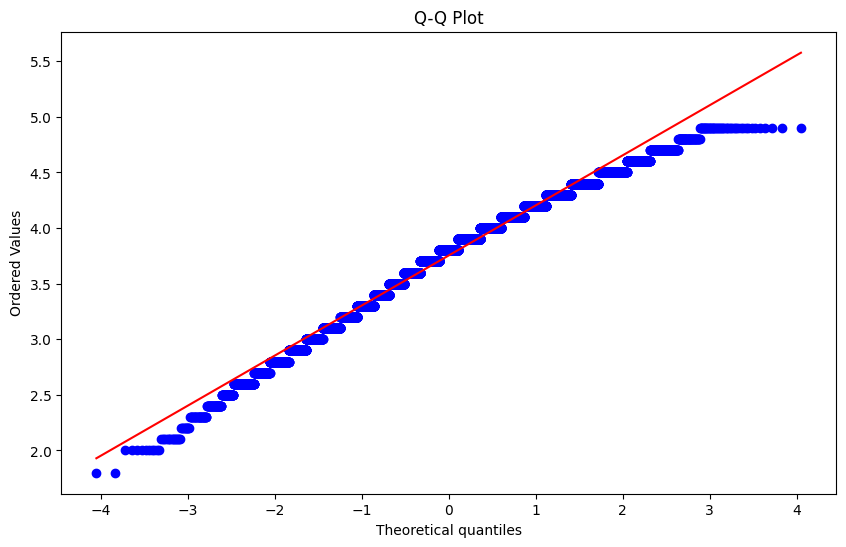

In [21]:
plt.figure(figsize = (10, 6))
sns.histplot(temp_data, kde = True, bins = 30, color = 'blue')
plt.title('Histogram')

plt.figure(figsize=(10, 6))
stats.probplot(temp_data, plot=plt)
plt.title('Q-Q Plot')
plt.show()

We can now see that shapiro and (Histogram, Q-Q) is giving a different results. because shaprio is sample size sensitive. the data is normally distributed and hence we should use mean

In [22]:
temp_data.describe()

count    27141.000000
mean         3.753568
std          0.453714
min          1.800000
25%          3.500000
50%          3.800000
75%          4.100000
max          4.900000
Name: rate, dtype: float64

CONCLUSION: Replacing with MEAN

In [23]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32051 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         32051 non-null  object 
 1   online_order                 32051 non-null  object 
 2   book_table                   32051 non-null  object 
 3   rate                         32051 non-null  float64
 4   votes                        32051 non-null  int64  
 5   location                     32037 non-null  object 
 6   rest_type                    31919 non-null  object 
 7   dish_liked                   17034 non-null  object 
 8   cuisines                     32019 non-null  object 
 9   approx_cost(for two people)  31859 non-null  object 
 10  listed_in(type)              32051 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.9+ MB


dish_liked still has lots of null values

In [25]:
df = df.drop(['dish_liked'], axis = 1)

In [26]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31730 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         31730 non-null  object 
 1   online_order                 31730 non-null  object 
 2   book_table                   31730 non-null  object 
 3   rate                         31730 non-null  float64
 4   votes                        31730 non-null  int64  
 5   location                     31730 non-null  object 
 6   rest_type                    31730 non-null  object 
 7   cuisines                     31730 non-null  object 
 8   approx_cost(for two people)  31730 non-null  object 
 9   listed_in(type)              31730 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 2.7+ MB


In [27]:
df.rename(columns = {'approx_cost(for two people)' : '2_people', 'listed_in(type)' : 'type'}, inplace = True)


In [28]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [29]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [30]:
df['2_people'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [31]:
def remove_comma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)

In [32]:
df['2_people'] = df['2_people'].apply(remove_comma)
df['2_people'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [33]:
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


General cluster is a function which will take all the values in the column which has a very small value count and group it into others.

In [34]:
def general_cluster(column, less_than_x):
    print(df[column].value_counts())
    value_counts = df[column].value_counts(ascending = False)
    value_counts_less_than_x = value_counts[value_counts < less_than_x]
    
    def clusterer(value):
         if(value in value_counts_less_than_x):
              return 'others'
         else:
              return value
    
    df[column] = df[column].apply(clusterer)
    print(df[column].value_counts())


In [35]:
general_cluster('rest_type', 1000)

rest_type
Quick Bites                   10934
Casual Dining                  7002
Cafe                           2391
Dessert Parlor                 1349
Delivery                       1327
                              ...  
Pop Up                            1
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64
rest_type
Quick Bites           10934
others                 7651
Casual Dining          7002
Cafe                   2391
Dessert Parlor         1349
Delivery               1327
Takeaway, Delivery     1076
Name: count, dtype: int64


In [36]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [37]:
general_cluster('location', 200)

location
BTM                     2073
Whitefield              1805
Indiranagar             1662
HSR                     1609
Marathahalli            1527
                        ... 
Kengeri                    5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: count, Length: 93, dtype: int64
location
others                   3497
BTM                      2073
Whitefield               1805
Indiranagar              1662
HSR                      1609
Marathahalli             1527
Koramangala 5th Block    1431
JP Nagar                 1335
Electronic City          1212
Jayanagar                1104
Bannerghatta Road        1021
Bellandur                 998
Sarjapur Road             870
Brigade Road              617
New BEL Road              582
Banashankari              560
Kalyan Nagar              553
Malleshwaram              550
Brookefield               528
MG Road                   527
Koramangala 4th Block    

In [38]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [39]:

general_cluster('cuisines', 100)


cuisines
North Indian                                                   1714
North Indian, Chinese                                          1376
South Indian                                                   1071
Bakery, Desserts                                                540
Biryani                                                         510
                                                               ... 
Andhra, Hyderabadi                                                1
North Indian, South Indian, Kerala, Chinese                       1
South Indian, Kebab, Chinese, Biryani                             1
Asian, Continental, Mediterranean, Salad, American, Biryani       1
North Indian, Chinese, Arabian, Momos                             1
Name: count, Length: 2704, dtype: int64
cuisines
others                                              18703
North Indian                                         1714
North Indian, Chinese                                1376
South Indian        

In [40]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [41]:
df['type'].value_counts()

type
Delivery              14496
Dine-out              11769
Desserts               2231
Cafes                  1162
Drinks & nightlife      875
Buffet                  623
Pubs and bars           574
Name: count, dtype: int64

Data seems like it can now be used to visualization

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0.0, 0, '0'),
  Text(500.0, 0, '500'),
  Text(1000.0, 0, '1000'),
  Text(1500.0, 0, '1500'),
  Text(2000.0, 0, '2000'),
  Text(2500.0, 0, '2500'),
  Text(3000.0, 0, '3000'),
  Text(3500.0, 0, '3500'),
  Text(4000.0, 0, '4000')])

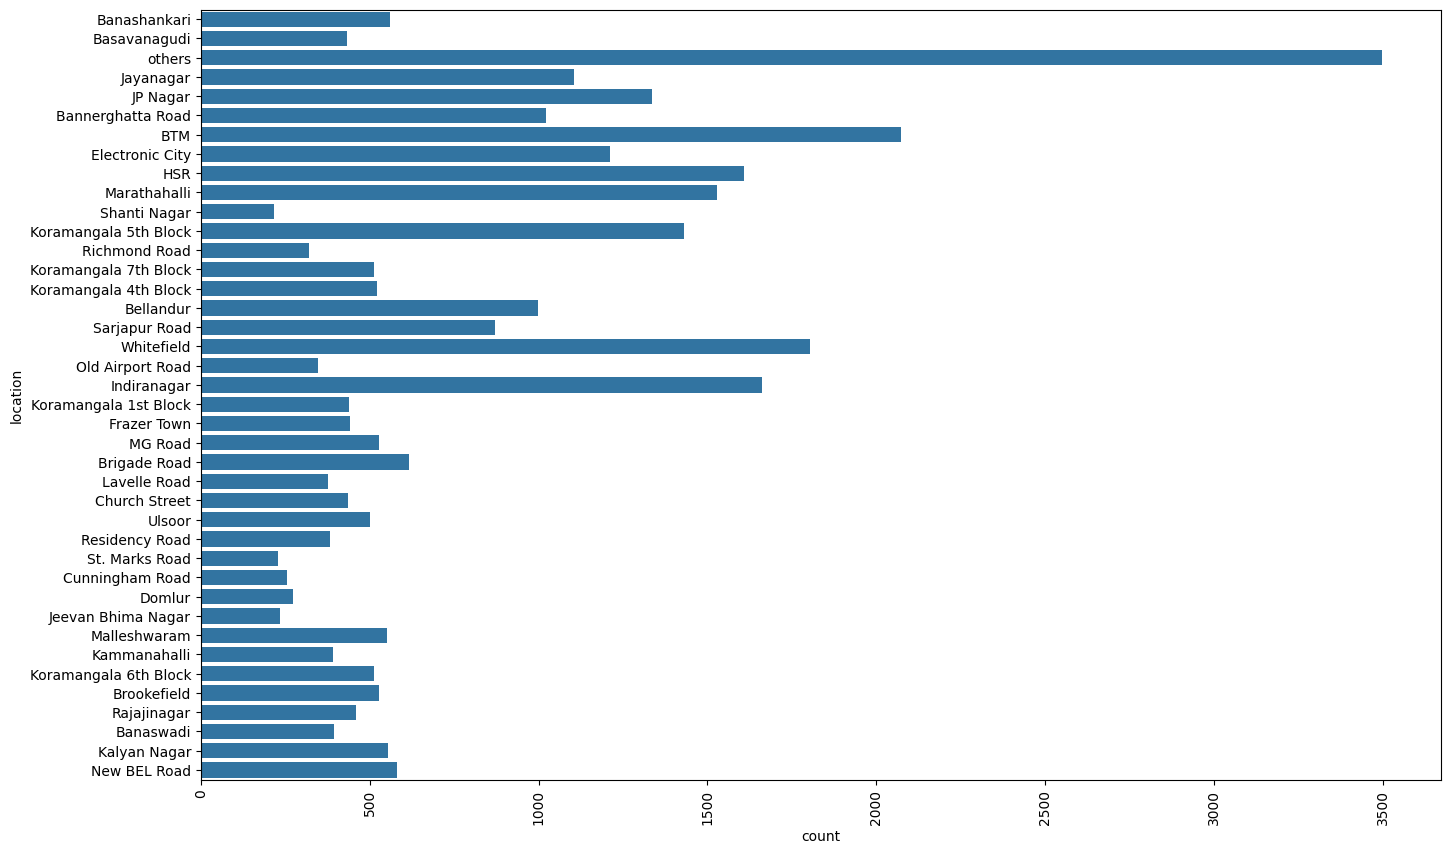

In [42]:
plt.figure(figsize = (16, 10))
ax = sns.countplot(df['location'])
#rotating the x ticks by 90 because they overlap each other

plt.xticks(rotation = 90)

C:\Users\gohil\AppData\Local\Temp\ipykernel_20752\658534635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['online_order'], palette='inferno')


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

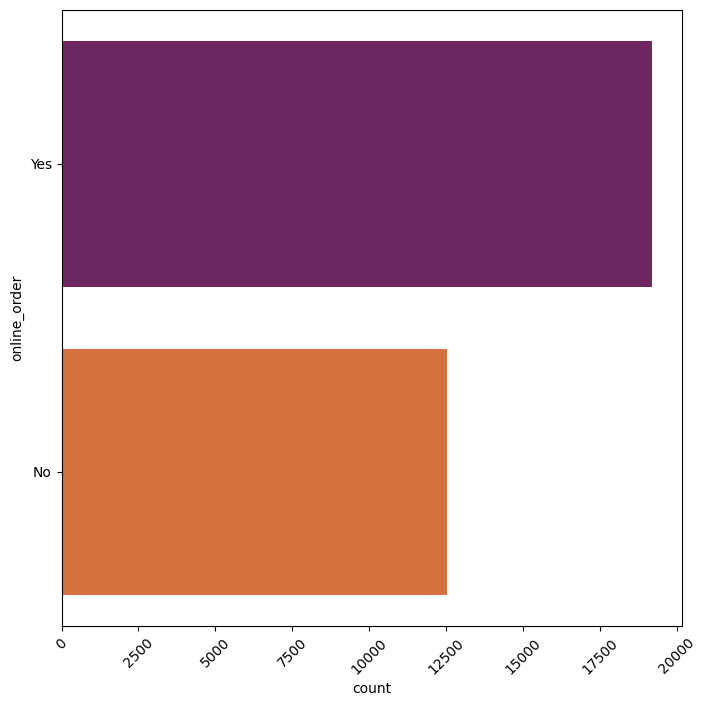

In [43]:
plt.figure(figsize=(8,8))
sns.countplot(df['online_order'], palette='inferno')
plt.xticks(rotation=45)

<Axes: xlabel='online_order', ylabel='rate'>

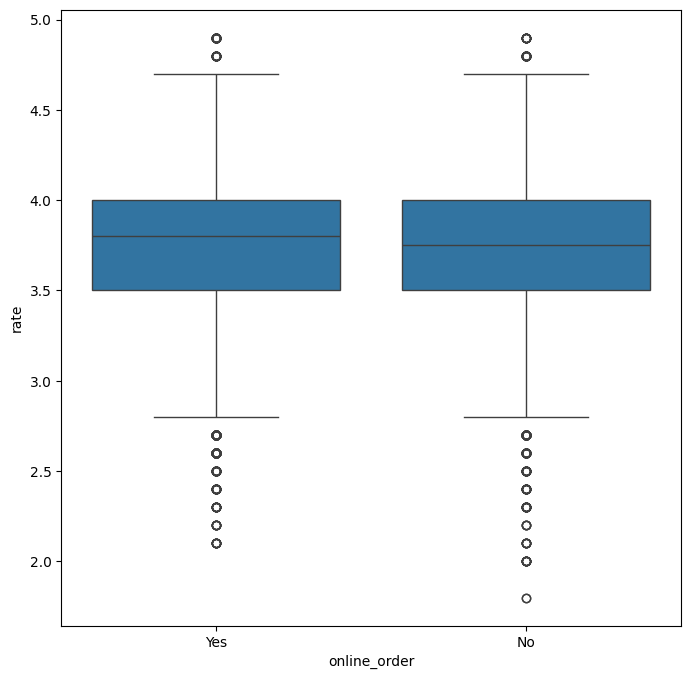

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'online_order', y = 'rate',data = df)

In [45]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


<Axes: xlabel='book_table', ylabel='rate'>

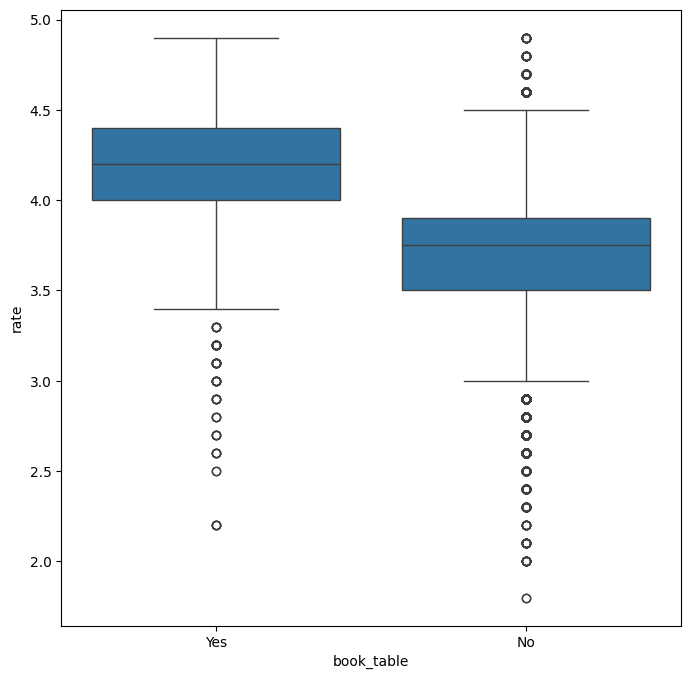

In [46]:
plt.figure(figsize=(8,8))
sns.boxplot(x = 'book_table', y = 'rate',data = df)

we looked at some basic plots and visualization to make analysis. But we will now move on to make plots grouped by column and visualizing them on pivot table. 

In [47]:
df1 = df.groupby(['location', 'online_order'])['name'].count()
df1.to_csv('location_vs_online.csv')
df1 = pd.read_csv('location_vs_online.csv')
df1 = pd.pivot_table(df1, values = None, index = ['location'], columns=['online_order'], fill_value = 0, aggfunc = np.sum)
df1

C:\Users\gohil\AppData\Local\Temp\ipykernel_20752\3983266586.py:4: FutureWarning: The provided callable <function sum at 0x000001984C3C2520> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df1 = pd.pivot_table(df1, values = None, index = ['location'], columns=['online_order'], fill_value = 0, aggfunc = np.sum)


name      
online_order             No   Yes
location                         
BTM                     628  1445
Banashankari            253   307
Banaswadi               180   214
Bannerghatta Road       384   637
Basavanagudi            167   266
Bellandur               365   633
Brigade Road            265   352
Brookefield             165   363
Church Street           176   260
Cunningham Road          69   187
Domlur                  148   126
Electronic City         657   555
Frazer Town             197   245
HSR                     416  1193
Indiranagar             604  1058
JP Nagar                524   811
Jayanagar               339   765
Jeevan Bhima Nagar       48   186
Kalyan Nagar            222   331
Kammanahalli            158   232
Koramangala 1st Block   118   321
Koramangala 4th Block   248   274
Koramangala 5th Block   520   911
Koramangala 6th Block   176   336
Koramangala 7th Block   148   364
Lavelle Road            226   149
MG Road                 268   259
Malleshwaram            218   332
Marathahalli            573   954
New BEL Road            250   332
Old Airport Road        170   177
Rajajinagar             211   247
Residency Road          250   131
Richmond Road           201   119
Sarjapur Road           261   609
Shanti Nagar            108   109
St. Marks Road          109   118
Ulsoor                  179   321
Whitefield              802  1003
others                 1534  1963

<Axes: xlabel='location'>

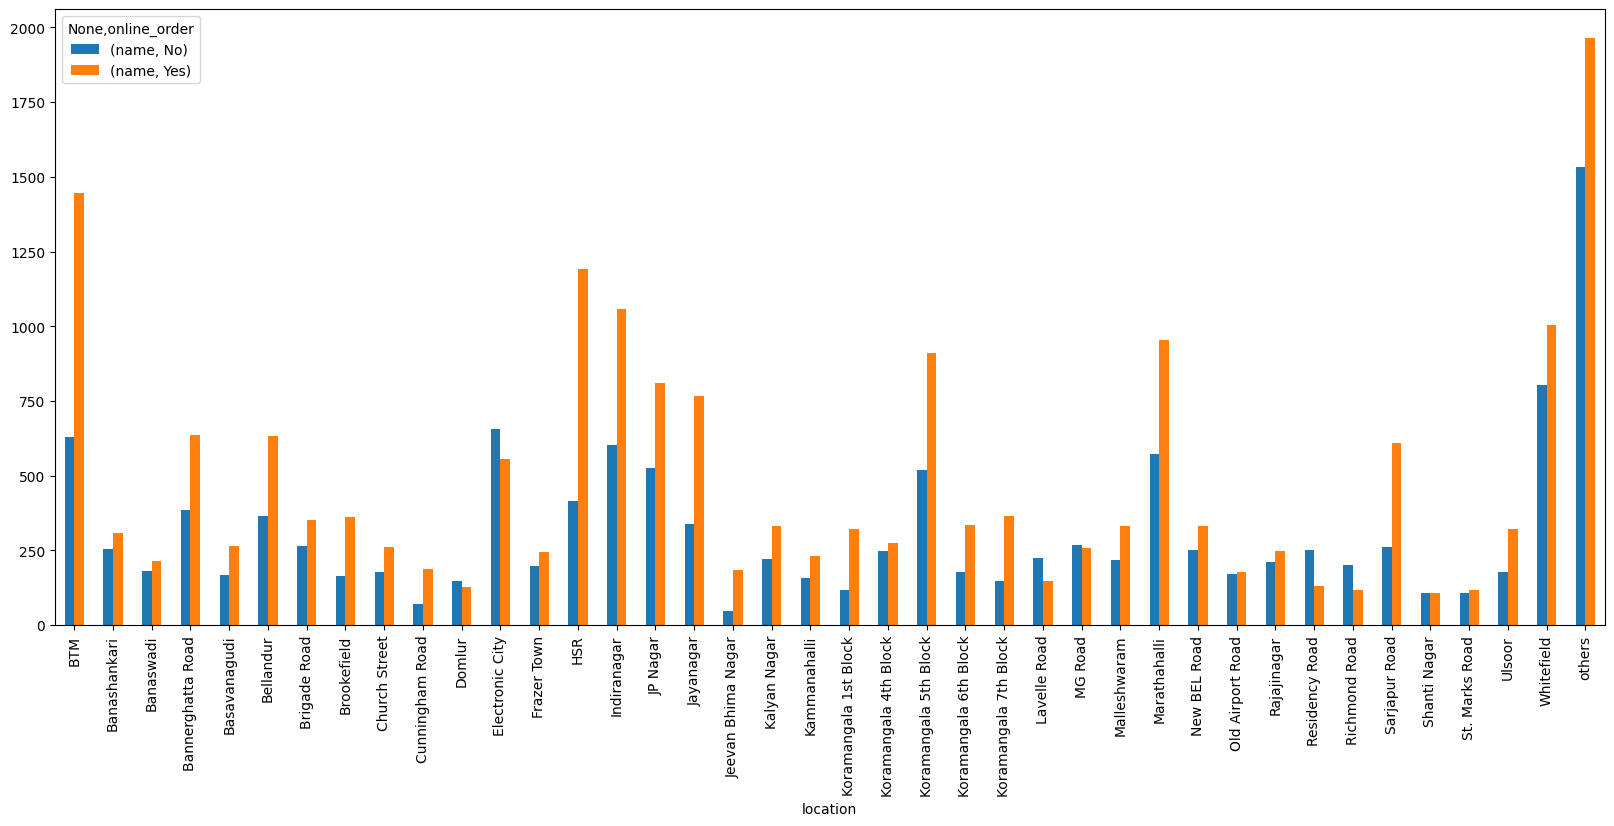

In [48]:
df1.plot(kind = 'bar', figsize=(20, 8))

In [49]:
df2 = df.groupby(['location', 'book_table'])['name'].count()
df2.to_csv('location_vs_book.csv')
df2 = pd.read_csv('location_vs_book.csv')
df2 = pd.pivot_table(df2, values = None, index = ['location'], columns=['book_table'], fill_value = 0, aggfunc = np.sum)
df2

C:\Users\gohil\AppData\Local\Temp\ipykernel_20752\2551310174.py:4: FutureWarning: The provided callable <function sum at 0x000001984C3C2520> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df2 = pd.pivot_table(df2, values = None, index = ['location'], columns=['book_table'], fill_value = 0, aggfunc = np.sum)


name     
book_table               No  Yes
location                        
BTM                    1957  116
Banashankari            516   44
Banaswadi               388    6
Bannerghatta Road       942   79
Basavanagudi            425    8
Bellandur               904   94
Brigade Road            475  142
Brookefield             455   73
Church Street           271  165
Cunningham Road         143  113
Domlur                  233   41
Electronic City        1116   96
Frazer Town             434    8
HSR                    1430  179
Indiranagar            1224  438
JP Nagar               1074  261
Jayanagar               890  214
Jeevan Bhima Nagar      230    4
Kalyan Nagar            436  117
Kammanahalli            356   34
Koramangala 1st Block   397   42
Koramangala 4th Block   282  240
Koramangala 5th Block   843  588
Koramangala 6th Block   436   76
Koramangala 7th Block   387  125
Lavelle Road            174  201
MG Road                 261  266
Malleshwaram            469   81
Marathahalli           1373  154
New BEL Road            527   55
Old Airport Road        290   57
Rajajinagar             418   40
Residency Road          265  116
Richmond Road           241   79
Sarjapur Road           725  145
Shanti Nagar            171   46
St. Marks Road          120  107
Ulsoor                  390  110
Whitefield             1559  246
others                 3208  289

<Axes: xlabel='location'>

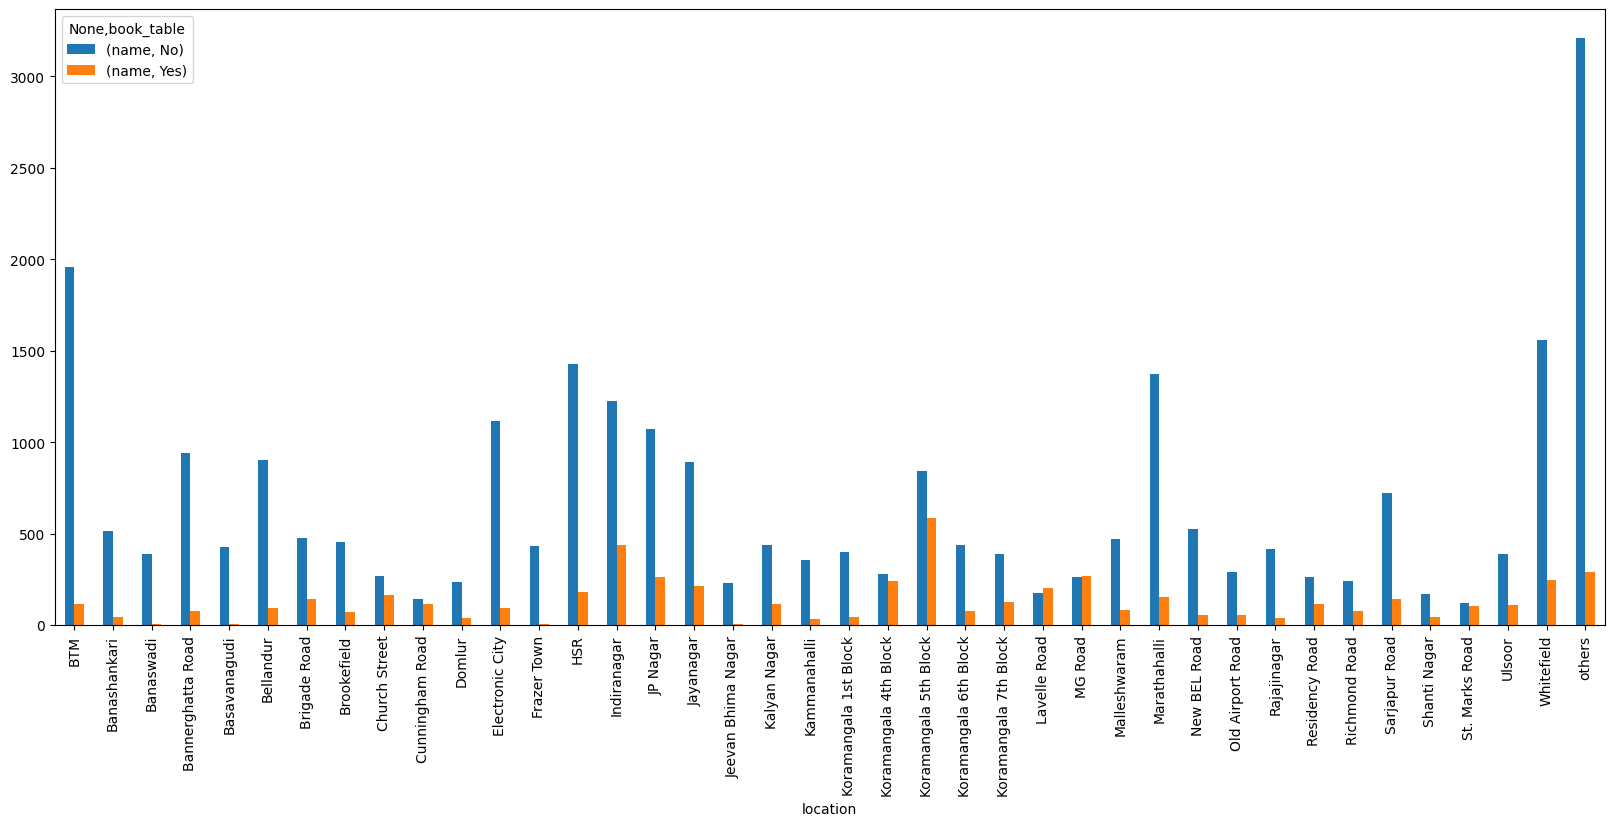

In [50]:
df2.plot(kind = 'bar', figsize=(20, 8))

TYPES OF RESTAURANTS VS THE RATING?

C:\Users\gohil\AppData\Local\Temp\ipykernel_20752\993655536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'type', y = 'rate', data = df, palette = 'Greens')


<Axes: xlabel='type', ylabel='rate'>

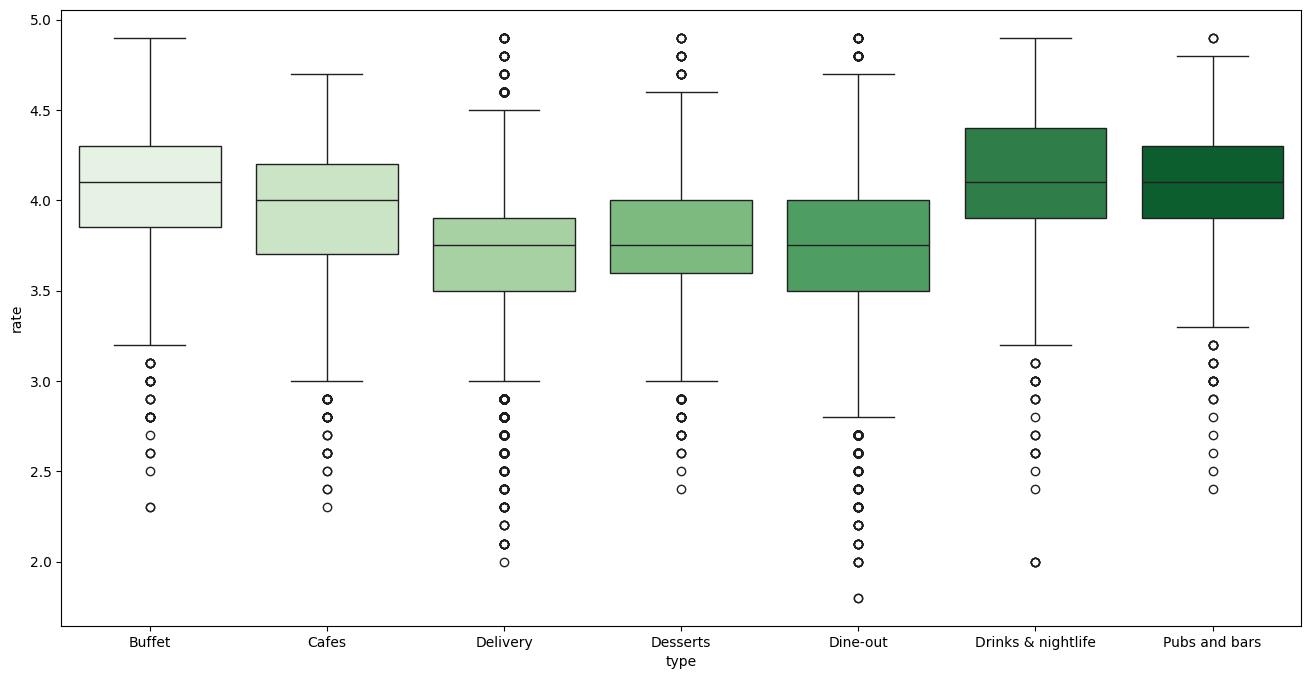

In [51]:
plt.figure(figsize=(16, 8))
sns.boxplot(x = 'type', y = 'rate', data = df, palette = 'Greens')

MAYBE LOCATION VS THE TYPES

In [52]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,2_people,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,others,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [53]:
df3 = df.groupby(['location', 'type'])['name'].count().reset_index()
df3.to_csv('location_&_type.csv', index=False)

df3 = pd.read_csv('location_&_type.csv')
df3= pd.pivot_table(df3, values='name', index='location', columns='type', fill_value=0, aggfunc=np.sum)
df3

C:\Users\gohil\AppData\Local\Temp\ipykernel_20752\439540444.py:5: FutureWarning: The provided callable <function sum at 0x000001984C3C2520> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df3= pd.pivot_table(df3, values='name', index='location', columns='type', fill_value=0, aggfunc=np.sum)


type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,14,39,1165,100,730,13,12
Banashankari,5,24,242,46,236,7,0
Banaswadi,0,14,158,19,198,4,1
Bannerghatta Road,8,27,500,89,386,9,2
Basavanagudi,3,8,186,45,189,2,0
Bellandur,24,32,459,59,394,16,14
Brigade Road,11,23,218,46,246,51,22
Brookefield,6,17,266,38,197,4,0
Church Street,19,43,134,19,170,30,21


In [54]:
df4 = df[['location', 'votes']]
df4.drop_duplicates()
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes', ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,1938646
Indiranagar,1123837
Koramangala 4th Block,580571
Church Street,554250
JP Nagar,484400


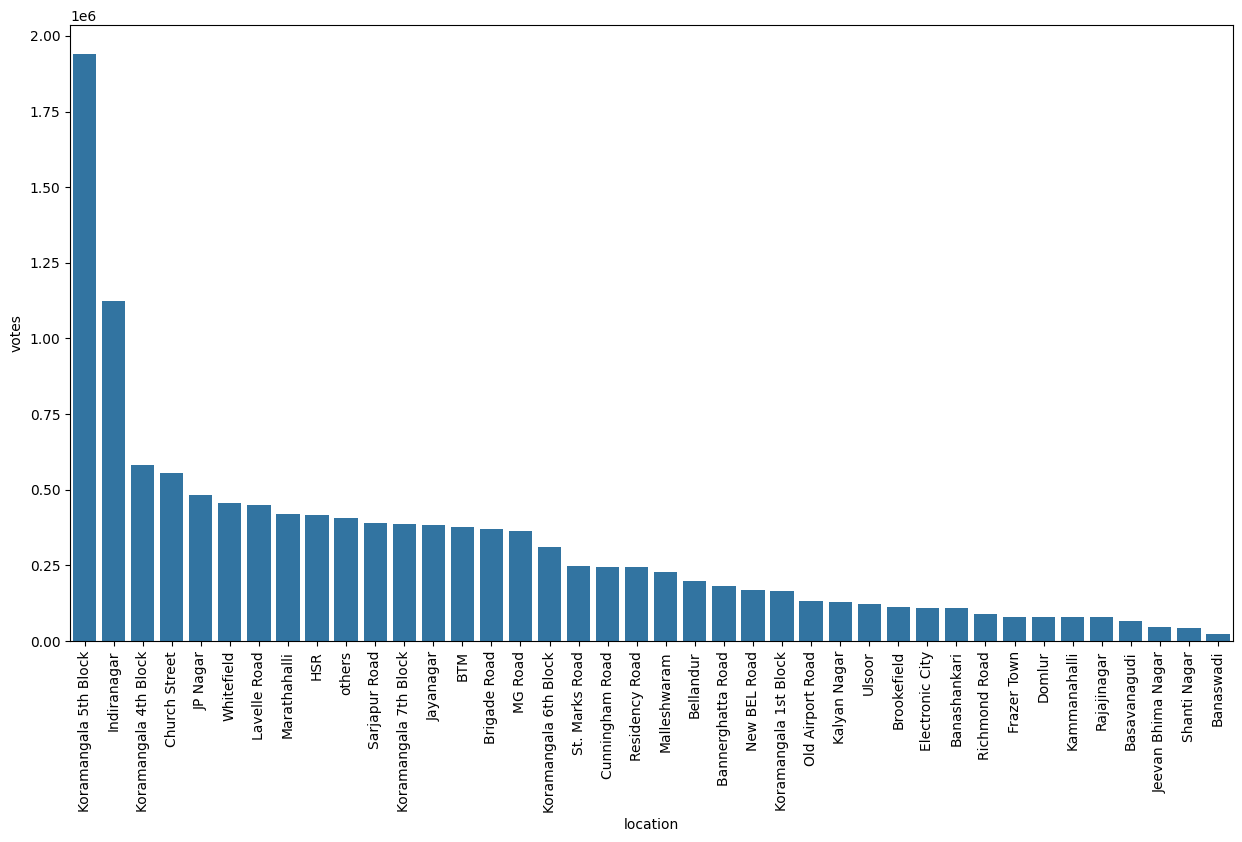

In [55]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df5.index, y=df5['votes'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.to_csv("my_data.csv", index=False)  # Replace "my_data.csv" with your desired filename
